## Task- 3

Begin by exploring the [instructor's notebook](https://github.com/nipunbatra/ml-teaching/blob/master/notebooks/siren.ipynb) that introduces the application of Random Fourier Features (RFF) for image reconstruction. Demonstrate the following applications using the cropped image from the notebook:
    
1.  Super-resolution: Perform superresolution on the image shown in notebook to enhance its resolution by factor 2. Show a qualitative comparison of original and reconstructed image. (i.e display original image and the image you created side by side) **[3 Marks]**

2. The above only helps us with a qualitative comparison. Let us now do a quantitative comparison. Compute the below given metrics:  **[1 Marks]**
    - RMSE on predicted v/s ground truth high resolution image
    - Peak SNR on predicted v/s ground truth high resolution image 

Follow the below steps to execute this task:
- Start with a 400x400 high-resolution image (the original image).
- Resize it to a 200x200 image (this will be your input image). You can use OpenCV's resize function or another library for this. Here’s a tutorial to help: [OpenCV Resize Image Tutorial](https://docs.google.com/document/d/1Gz9pl8nvzqOq8huGGgWnEwzPUJbMU8mC/edit).
- Use Random Fourier Features (RFF) along with linear regression to learn a function based on the 200x200 image.
- Use the learned function to predict the pixel values for the 400x400 image. This means predicting the values for the pixels that fall between the existing pixels of the 200x200 image.
- Compare your predicted 400x400 image with the original 400x400 high-resolution image.
- Calculate the Root Mean Squared Error (RMSE) and Peak Signal-to-Noise Ratio (PSNR) between the predicted image and the original high-resolution image.


### Question-1 : Demonstrate the following applications using the cropped image from the notebook. Super-resolution: Perform supe resolution on the image shown in notebook to enhance its resolution by factor 2. Show a qualitative comparison of original and reconstructed image. (i.e display original image and the image you created side by side) 

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os
import numpy as np
import pandas as pd
import torch.nn as nn
import torch.nn.functional as F
from torchvision.transforms.functional import crop as torchvision_crop

%config InlineBackend.figure_format = 'retina'

try:
    from einops import rearrange
except ImportError:
    %pip install einops
    from einops import rearrange


c:\Users\abhay\anaconda3\envs\yolov5-env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Demonstrate the following applications using the cropped image from the notebook. Super-resolution: Perform supe resolution on the image shown in notebook to enhance its resolution by factor 2.
# Need to use random fourier features. 
# take an image 1.jpg and crop it 
if os.path.exists('dog.jpg'):
    print('dog.jpg exists')
else:
    !wget https://segment-anything.com/assets/gallery/AdobeStock_94274587_welsh_corgi_pembroke_CD.jpg


dog.jpg exists


In [4]:
# read the image 
img = torchvision.io.read_image("dog.jpg")
print(img.shape)


torch.Size([3, 1365, 2048])


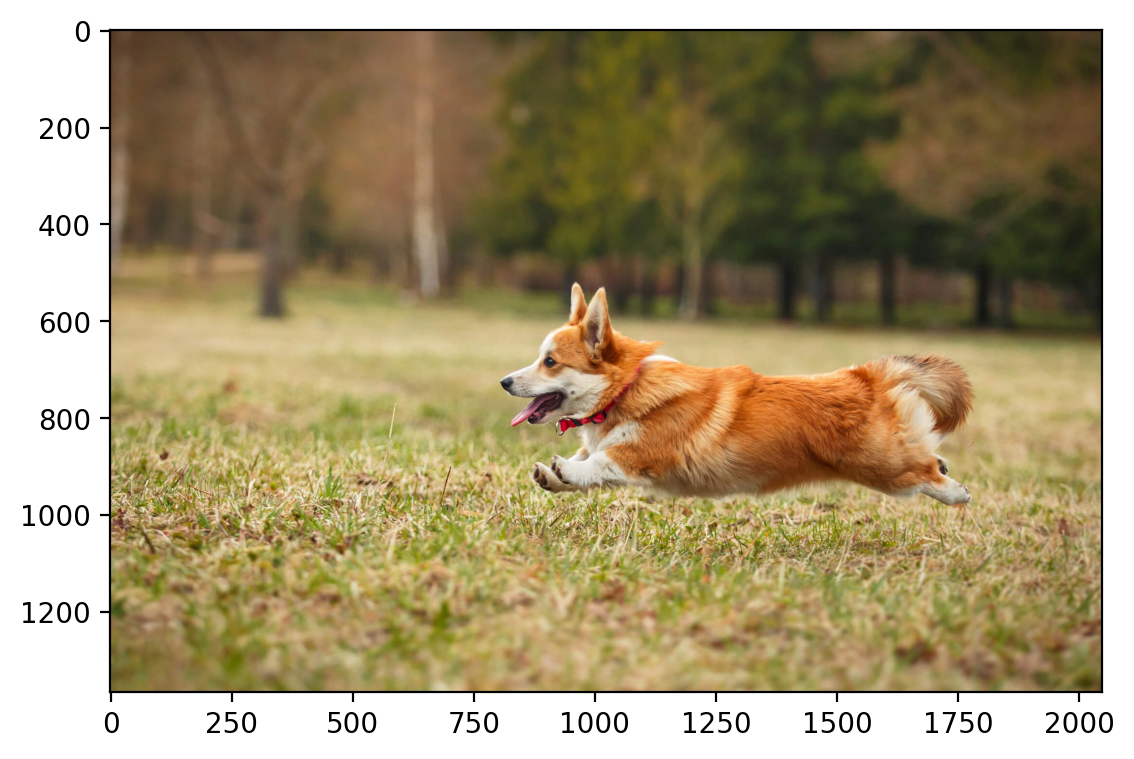

In [5]:
plt.imshow(rearrange(img, 'c h w -> h w c').numpy())


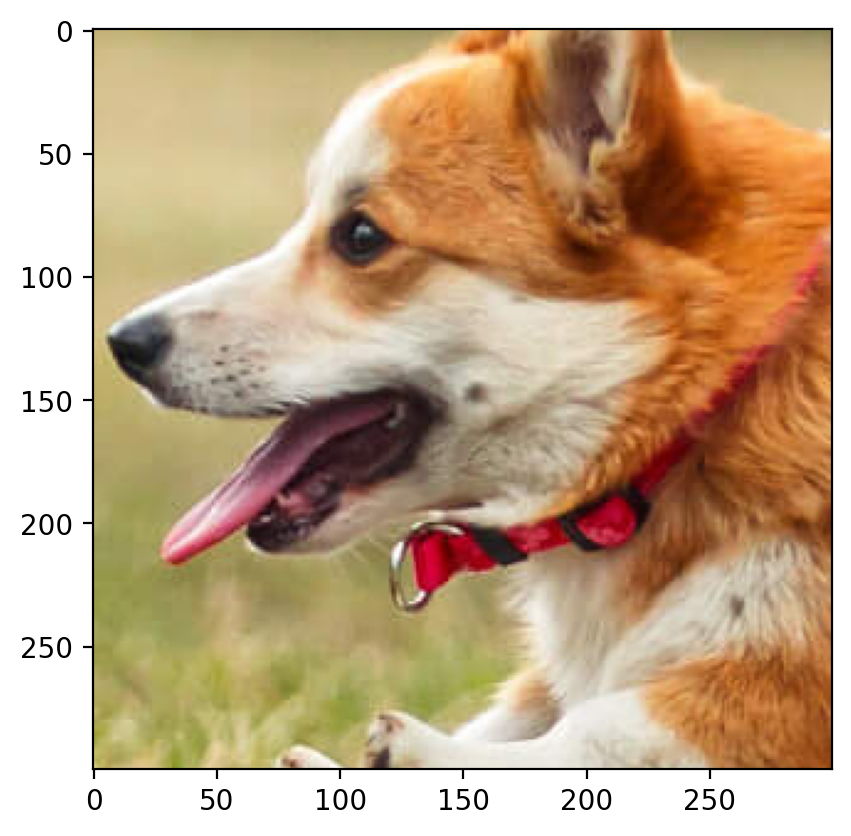

In [6]:
from sklearn import preprocessing

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

scaler_img = preprocessing.MinMaxScaler().fit(img.reshape(-1, 1))
scaler_img
img_scaled = scaler_img.transform(img.reshape(-1, 1)).reshape(img.shape)
img_scaled.shape

img_scaled = torch.tensor(img_scaled)
img_scaled = img_scaled.to(device)
img_scaled

crop = torchvision.transforms.functional.crop(img_scaled.cpu(), 600, 800, 300, 300)
crop.shape

plt.imshow(rearrange(crop, 'c h w -> h w c').cpu().numpy())

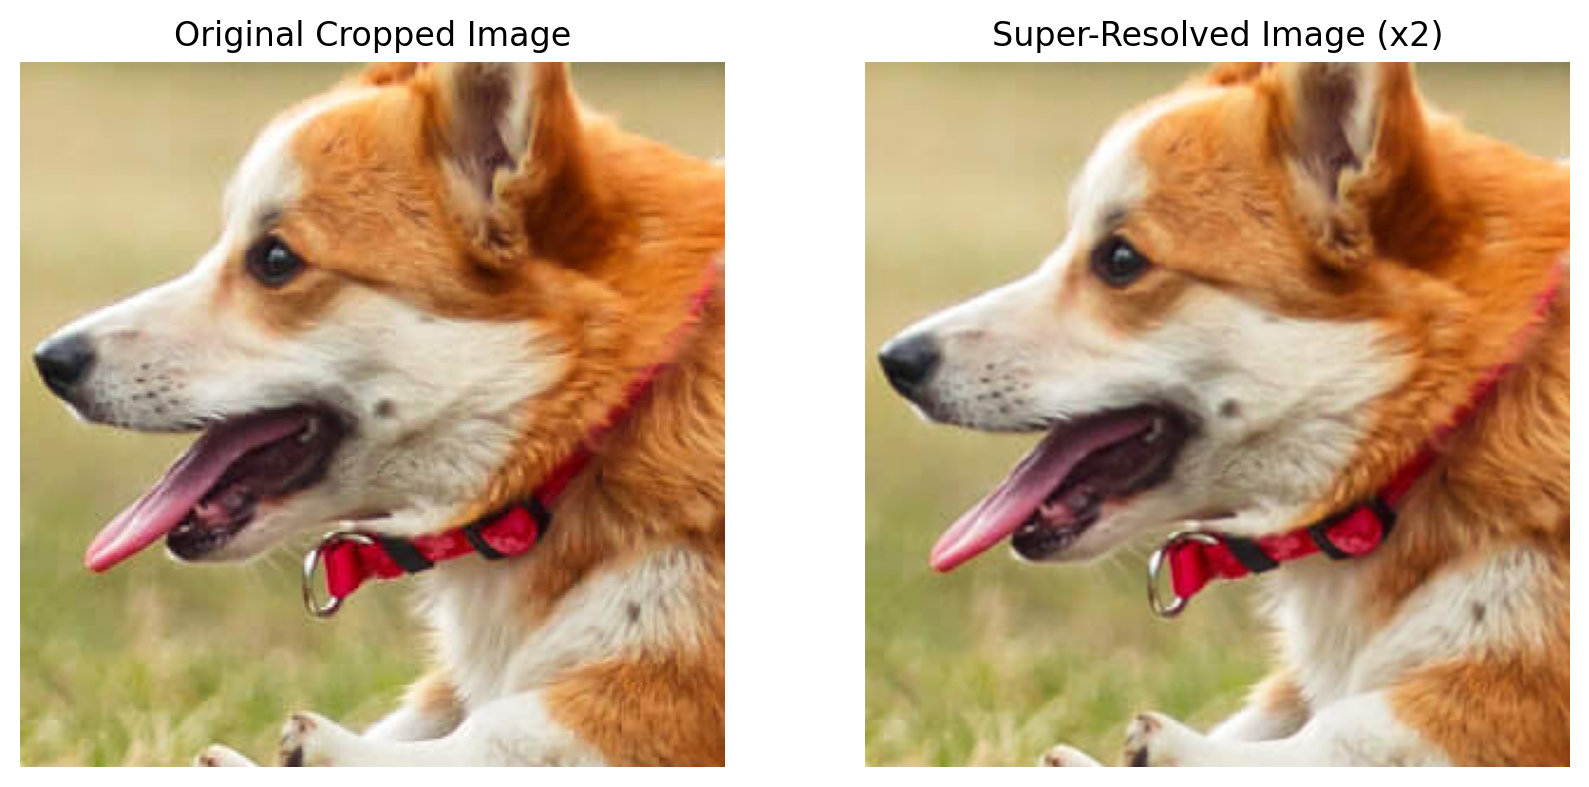

In [7]:
# Function to perform simple bilinear interpolation for super-resolution
def perform_super_resolution(image, scale_factor=2):
    """
    Perform super-resolution using bilinear interpolation.
    Upscales the image by a factor of `scale_factor`.
    """
    # Upsample the image using bilinear interpolation
    upsampled_image = torch.nn.functional.interpolate(
        image.unsqueeze(0).float(), 
        scale_factor=scale_factor, 
        mode='bilinear', 
        align_corners=False
    )
    return upsampled_image.squeeze(0)  # Remove batch dimension

# Preprocessing the image
img = torchvision.io.read_image("dog.jpg")

# Normalize the image using MinMaxScaler
scaler_img = preprocessing.MinMaxScaler().fit(img.reshape(-1, 1))
img_scaled = scaler_img.transform(img.reshape(-1, 1)).reshape(img.shape)
img_scaled = torch.tensor(img_scaled)

# Crop the image (same as in the notebook)
crop = torchvision_crop(img_scaled, 600, 800, 300, 300)

# Move the cropped image to the device (GPU or CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
crop = crop.to(device)

# Perform super-resolution (upsample by a factor of 2)
crop_super_res = perform_super_resolution(crop, scale_factor=2)

# Convert both images back to CPU for visualization
crop_cpu = crop.cpu()
crop_super_res_cpu = crop_super_res.cpu()

# Display side-by-side comparison
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Original cropped image
axs[0].imshow(rearrange(crop_cpu, 'c h w -> h w c').numpy())
axs[0].set_title("Original Cropped Image")
axs[0].axis('off')

# Super-resolved image
axs[1].imshow(rearrange(crop_super_res_cpu, 'c h w -> h w c').detach().numpy())
axs[1].set_title("Super-Resolved Image (x2)")
axs[1].axis('off')

plt.show()


### Question- 2. The above only helps us with a qualitative comparison. Let us now do a quantitative comparison. Compute the below given metrics:  **[1 Marks]**- RMSE on predicted v/s ground truth high resolution image - Peak SNR on predicted v/s ground truth high resolution image 

In [8]:
# from previous code Compute the below given metrics:- RMSE on predicted v/s ground truth high resolution image - Peak SNR on predicted v/s ground truth high resolution image.



